In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from torch import from_numpy
import torch

x,y = sklearn.datasets.make_circles(1000,random_state=42,noise=0.01)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train= from_numpy(x_train).type(torch.float)
y_train = from_numpy(y_train).type(torch.float).unsqueeze(1)
x_test = from_numpy(x_test).type(torch.float)
y_test = from_numpy(y_test).type(torch.float).unsqueeze(1)
len(x_train), len(y_train), len(x_test), len(y_test)

(800, 800, 200, 200)

(torch.Size([800, 2]), torch.Size([800, 1]))

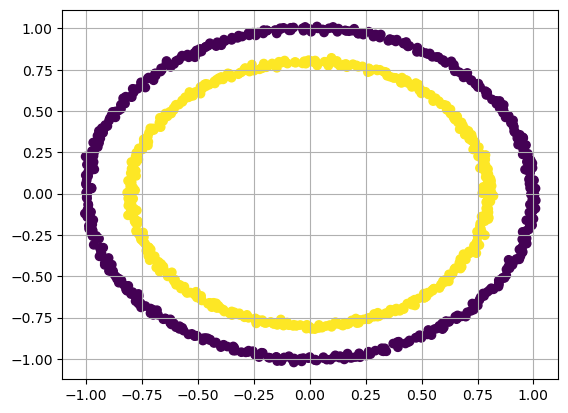

In [2]:
from matplotlib import pyplot as plt


plt.scatter(x[:, 0], x[:, 1], c=y)
plt.grid(True)
x_train.shape, y_train.shape

In [3]:
import torch


class CicleDetectionModel(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.layer1 = torch.nn.Linear(2,8)
		self.layer2 = torch.nn.Linear(8,4)
		self.layer3 = torch.nn.Linear(4,1)
		self.relu = torch.nn.ReLU()
	def forward(self, x: torch.Tensor) -> torch.Tensor:
		z = self.layer1(x)
		z = self.relu(z)
		z = self.layer2(z)
		z = self.relu(z)
		z = self.layer3(z)
		return z

In [4]:
torch.manual_seed(42)
mdl = CicleDetectionModel()

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(mdl.parameters(),0.1)

def accuracy_fn(preds: torch.Tensor, y: torch.Tensor) -> float:
	sum = torch.eq(preds, y).sum()
	acc = (sum/len(y))*100
	return acc
mdl

CicleDetectionModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
)

In [5]:
epochs = 1000
for epoch in range(epochs):
	mdl.train()

	logits = mdl(x_train)
	preds = torch.round(torch.sigmoid(logits))

	loss = loss_fn(logits, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()

	mdl.eval()

	with torch.inference_mode():
		test_logits = mdl(x_test)
		test_preds = torch.round(torch.sigmoid(test_logits))

		test_loss = loss_fn(test_logits, y_test)
		test_accuracy = accuracy_fn(test_preds, y_test)

	if (epoch+1)%100==0:
		print(f"epoch:{epoch+1}\tacc:{test_accuracy:.0f}% loss:{test_loss:.2f}")

epoch:100	acc:57% loss:0.69
epoch:200	acc:56% loss:0.69
epoch:300	acc:56% loss:0.68
epoch:400	acc:57% loss:0.68
epoch:500	acc:57% loss:0.68
epoch:600	acc:58% loss:0.67
epoch:700	acc:59% loss:0.67
epoch:800	acc:72% loss:0.66
epoch:900	acc:70% loss:0.64
epoch:1000	acc:72% loss:0.62
